### **Thyroid Disease Classification using Neural Network**

**Data Loading and Preprocessing**




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
# Load the dataset
data_path = 'sample_data/thyroidDF.csv'
df = pd.read_csv(data_path)

In [3]:
# Print the initial shape of the dataset
print("Initial dataset shape:", df.shape)

Initial dataset shape: (9172, 31)


In [4]:
print(df.iloc[:, :4], df['target'])

      age sex on_thyroxine query_on_thyroxine
0      29   F            f                  f
1      29   F            f                  f
2      41   F            f                  f
3      36   F            f                  f
4      32   F            f                  f
...   ...  ..          ...                ...
9167   56   M            f                  f
9168   22   M            f                  f
9169   69   M            f                  f
9170   47   F            f                  f
9171   31   M            f                  f

[9172 rows x 4 columns] 0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object


In [5]:

# Handling missing values
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)


In [6]:
# Encode categorical variables using Label Encoder
for column in df.columns:
    if df[column].dtype == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])


In [7]:
# Balancing skewed dataset
# Separate majority and minority classes
df_majority = df[df.target == df.target.mode()[0]]
df_minority = df[df.target != df.target.mode()[0]]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset to avoid any order bias
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print("New dataset shape:", df.shape)  # Print the new shape of the dataset


New dataset shape: (13542, 31)


In [8]:
# Separate features and target variable
features = df.drop(['target', 'patient_id'], axis=1)
labels = df['target']


In [9]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)


**Model**

In [11]:
# Define the neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(trainX.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(labels.unique()), activation='softmax')
])


In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(trainX, trainY, epochs=10, validation_data=(testX, testY))


Epoch 1/10
339/339 [==============================] - 6s 8ms/step - loss: 1.1593 - accuracy: 0.6687 - val_loss: 0.6946 - val_accuracy: 0.7700
Epoch 2/10
339/339 [==============================] - 1s 3ms/step - loss: 0.5526 - accuracy: 0.8185 - val_loss: 0.4791 - val_accuracy: 0.8372
Epoch 3/10
339/339 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8586 - val_loss: 0.3885 - val_accuracy: 0.8630
Epoch 4/10
339/339 [==============================] - 1s 3ms/step - loss: 0.3284 - accuracy: 0.8821 - val_loss: 0.3515 - val_accuracy: 0.8800
Epoch 5/10
339/339 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.8947 - val_loss: 0.3041 - val_accuracy: 0.8808
Epoch 6/10
339/339 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.9056 - val_loss: 0.2900 - val_accuracy: 0.9007
Epoch 7/10
339/339 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9117 - val_loss: 0.2630 - val_accuracy: 0.9121
Epoch 

**Plotting Training and Validation Metrics**

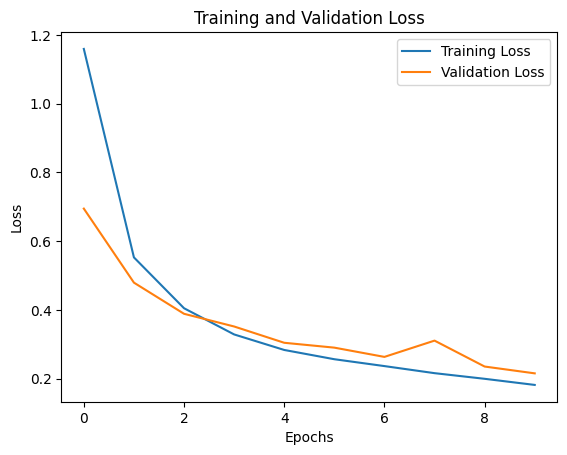

In [14]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

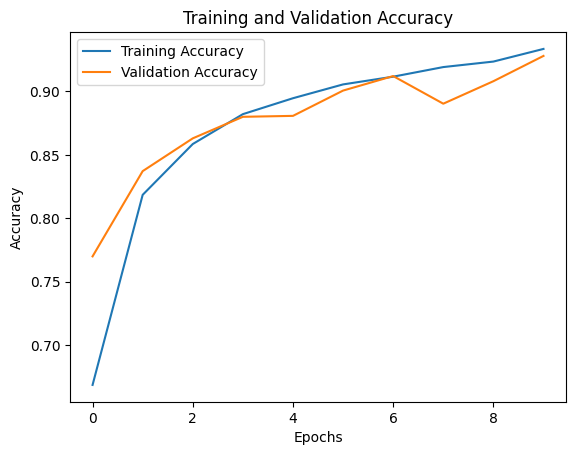

In [15]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [16]:

predictions = model.predict(testX)
predicted_classes = np.argmax(predictions, axis=1)

accuracy = accuracy_score(testY, predicted_classes)
precision = precision_score(testY, predicted_classes, average='weighted')
recall = recall_score(testY, predicted_classes, average='weighted')
f1 = f1_score(testY, predicted_classes, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


85/85 [==============================] - 0s 2ms/step
Accuracy: 0.9280177187153932
Precision: 0.9324928247906574
Recall: 0.9280177187153932
F1-score: 0.9274882283493258


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
Total params: 30688 (119.88 KB)
Trainable params: 30688 (119.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
